Understanding the Dataset:


In [1]:
import pandas as pd
df = pd.read_csv('Groceriesdatatrain.csv')

In [2]:
print("Dataset Overview:")
print(df.head())  
print("\nDataset Shape:")
print(df.shape)

Dataset Overview:
   Member_number        Date  itemDescription  year  month  day  day_of_week
0           3021  30/01/2015      frankfurter  2015      1   30            4
1           1292  24/10/2015             pork  2015     10   24            5
2           4206   4/04/2014  root vegetables  2014      4    4            4
3           4369  25/08/2015           onions  2015      8   25            1
4           1522   1/07/2014          waffles  2014      7    1            1

Dataset Shape:
(27000, 7)


In [3]:
#Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


In [4]:
#Checking for datatypes
print("\nData Types:")
print(df.dtypes) 


Data Types:
Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object


In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Member_number          year         month           day   day_of_week
count   27000.000000  27000.000000  27000.000000  27000.000000  27000.000000
mean     3002.872667   2014.529037      6.485074     15.744444      3.020852
std      1153.928123      0.499165      3.431239      8.784553      1.987826
min      1000.000000   2014.000000      1.000000      1.000000      0.000000
25%      2003.000000   2014.000000      4.000000      8.000000      1.000000
50%      3002.000000   2015.000000      6.000000     16.000000      3.000000
75%      4010.000000   2015.000000      9.000000     23.000000      5.000000
max      5000.000000   2015.000000     12.000000     31.000000      6.000000


In [6]:
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']):  
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique Values in Categorical Columns:

Date:
Date
21/07/2015    70
29/11/2015    69
8/08/2015     68
26/03/2015    65
16/05/2015    64
              ..
15/01/2014    15
7/04/2014     14
16/03/2015    14
17/03/2015    14
9/01/2015     11
Name: count, Length: 728, dtype: int64

itemDescription:
itemDescription
whole milk               1709
other vegetables         1320
rolls/buns               1197
soda                     1060
yogurt                    928
                         ... 
bags                        3
rubbing alcohol             3
frozen chicken              2
preservation products       1
kitchen utensil             1
Name: count, Length: 167, dtype: int64


Preprocessing the Data:


In [7]:
!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder

In [8]:
# Converting Date Column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
# Selecting relevant columns for mining frequent itemsets
transactions = df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

In [10]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [11]:
# Displaying the processed dataset
print("Processed Dataset:")
print(df_encoded.head())

Processed Dataset:
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread

In [12]:
print("\nEncoded Dataset Shape:")
print(df_encoded.shape)


Encoded Dataset Shape:
(3872, 167)


In [13]:
item_counts = df_encoded.sum().sort_values(ascending=False)
print("\nItem Frequencies:")
print(item_counts)


Item Frequencies:
whole milk               1345
other vegetables         1103
rolls/buns               1019
soda                      910
yogurt                    797
                         ... 
bags                        3
baby cosmetics              3
frozen chicken              2
kitchen utensil             1
preservation products       1
Length: 167, dtype: int64


Frequent Itemset Mining:


In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

min_support = 0.01 

# Applying Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
      support                                           itemsets
0    0.010847                            (Instant food products)
1    0.052686                                         (UHT-milk)
2    0.022211                                    (baking powder)
3    0.090134                                             (beef)
4    0.057335                                          (berries)
..        ...                                                ...
842  0.025826                         (whole milk, yogurt, soda)
843  0.017820               (tropical fruit, whole milk, yogurt)
844  0.015238           (whole milk, yogurt, whipped/sour cream)
845  0.011364  (sausage, whole milk, rolls/buns, other vegeta...
846  0.010847   (soda, whole milk, rolls/buns, other vegetables)

[847 rows x 2 columns]

Association Rules:
                         antecedents  \
0                         (UHT-milk)   
1                    (bottled water)   
2                         (UHT-milk) 

Evaluation of Patterns:


In [15]:
print("Top Frequent Itemsets:")
top_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
print(top_frequent_itemsets)

Top Frequent Itemsets:
      support            itemsets
99   0.347366        (whole milk)
63   0.284866  (other vegetables)
76   0.263171        (rolls/buns)
85   0.235021              (soda)
100  0.205837            (yogurt)
77   0.169421   (root vegetables)
93   0.162190    (tropical fruit)
7    0.159866     (bottled water)
80   0.148244           (sausage)
21   0.133781      (citrus fruit)


In [16]:
print("\nTop Association Rules by Confidence:")
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)
print(top_confidence_rules)


Top Association Rules by Confidence:
                                  antecedents   consequents  \
1359             (canned beer, shopping bags)  (whole milk)   
1521                           (curd, yogurt)  (whole milk)   
2143            (sausage, whipped/sour cream)  (whole milk)   
2210  (sausage, rolls/buns, other vegetables)  (whole milk)   
1389                      (chocolate, yogurt)  (whole milk)   
1491              (cream cheese , rolls/buns)  (whole milk)   
1515                             (curd, soda)  (whole milk)   
1095             (brown bread, bottled water)  (whole milk)   
1353                   (sausage, canned beer)  (whole milk)   
1222                  (yogurt, bottled water)  (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
1359            0.016787            0.347366  0.010589    0.630769  1.815865   
1521            0.020145            0.347366  0.012397    0.615385  1.771576   
2143            0.021436    

In [17]:
print("\nTop Association Rules by Lift:")
top_lift_rules = rules.sort_values(by='lift', ascending=False).head(10)
print(top_lift_rules)


Top Association Rules by Lift:
                                     antecedents  \
2217              (rolls/buns, other vegetables)   
2212                       (sausage, whole milk)   
2213                       (sausage, rolls/buns)   
2216              (whole milk, other vegetables)   
2211  (whole milk, rolls/buns, other vegetables)   
2218                                   (sausage)   
2215                    (whole milk, rolls/buns)   
2214                 (sausage, other vegetables)   
1094                   (brown bread, whole milk)   
1099                             (bottled water)   

                                     consequents  antecedent support  \
2217                       (sausage, whole milk)            0.080837   
2212              (rolls/buns, other vegetables)            0.060950   
2213              (whole milk, other vegetables)            0.046746   
2216                       (sausage, rolls/buns)            0.112345   
2211                               

In [18]:
print("\nTop Association Rules by Leverage:")
top_leverage_rules = rules.sort_values(by='leverage', ascending=False).head(10)
print(top_leverage_rules)


Top Association Rules by Leverage:
             antecedents         consequents  antecedent support  \
1008        (whole milk)            (yogurt)            0.347366   
1009            (yogurt)        (whole milk)            0.205837   
890         (whole milk)        (rolls/buns)            0.347366   
891         (rolls/buns)        (whole milk)            0.263171   
796         (whole milk)  (other vegetables)            0.347366   
797   (other vegetables)        (whole milk)            0.284866   
187      (bottled water)        (whole milk)            0.159866   
186         (whole milk)     (bottled water)            0.347366   
771   (other vegetables)           (sausage)            0.284866   
770            (sausage)  (other vegetables)            0.148244   

      consequent support   support  confidence      lift  leverage  \
1008            0.205837  0.087293    0.251301  1.220876  0.015793   
1009            0.347366  0.087293    0.424090  1.220876  0.015793   
890  

In [19]:
print("\nTop Association Rules by Conviction:")
top_conviction_rules = rules.sort_values(by='conviction', ascending=False).head(10)
print(top_conviction_rules)


Top Association Rules by Conviction:
                                  antecedents   consequents  \
1359             (canned beer, shopping bags)  (whole milk)   
1521                           (curd, yogurt)  (whole milk)   
2143            (sausage, whipped/sour cream)  (whole milk)   
2210  (sausage, rolls/buns, other vegetables)  (whole milk)   
1389                      (chocolate, yogurt)  (whole milk)   
1491              (cream cheese , rolls/buns)  (whole milk)   
1515                             (curd, soda)  (whole milk)   
1095             (brown bread, bottled water)  (whole milk)   
1353                   (sausage, canned beer)  (whole milk)   
1222                  (yogurt, bottled water)  (whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
1359            0.016787            0.347366  0.010589    0.630769  1.815865   
1521            0.020145            0.347366  0.012397    0.615385  1.771576   
2143            0.021436    

In [20]:
print("\nTop Association Rules by Zhang's Metric:")
top_zhangs_metric_rules = rules.sort_values(by='zhangs_metric', ascending=False).head(10)
print(top_zhangs_metric_rules)


Top Association Rules by Zhang's Metric:
                         antecedents                              consequents  \
1362                    (whole milk)             (canned beer, shopping bags)   
1524                    (whole milk)                           (curd, yogurt)   
2146                    (whole milk)            (sausage, whipped/sour cream)   
2219                    (whole milk)  (sausage, rolls/buns, other vegetables)   
1392                    (whole milk)                      (chocolate, yogurt)   
2217  (rolls/buns, other vegetables)                    (sausage, whole milk)   
1494                    (whole milk)              (cream cheese , rolls/buns)   
2216  (whole milk, other vegetables)                    (sausage, rolls/buns)   
1518                    (whole milk)                             (curd, soda)   
2212           (sausage, whole milk)           (rolls/buns, other vegetables)   

      antecedent support  consequent support   support  confidence

In [21]:
import matplotlib.pyplot as plt

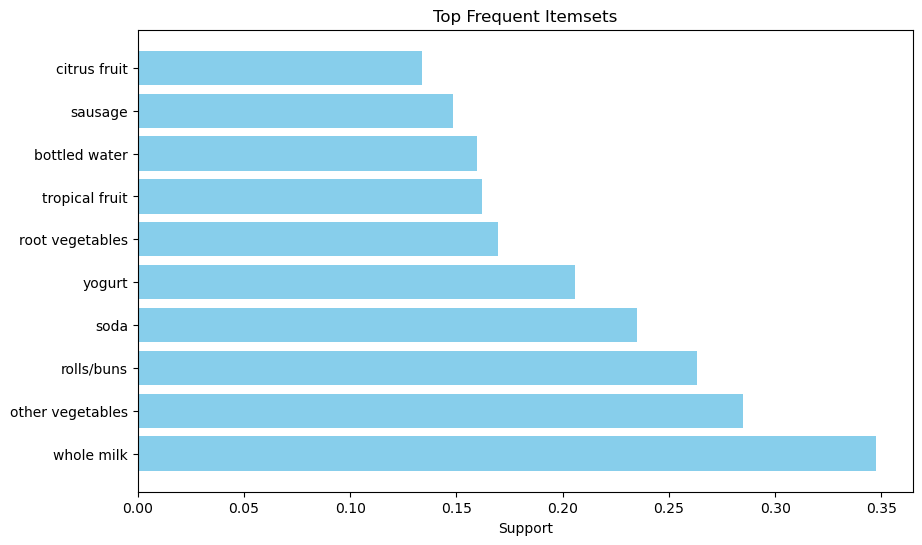

In [22]:
# Visualizing data
plt.figure(figsize=(10, 6))
plt.barh(top_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), top_frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top Frequent Itemsets')
plt.show()

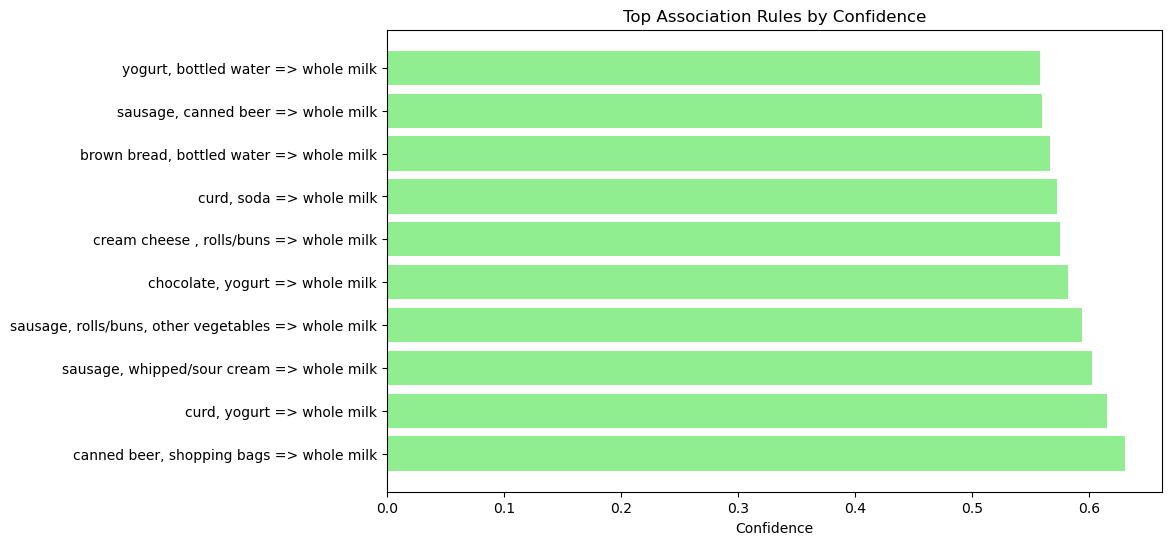

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(top_confidence_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " => " + top_confidence_rules['consequents'].apply(lambda x: ', '.join(list(x))), 
         top_confidence_rules['confidence'], color='lightgreen')
plt.xlabel('Confidence')
plt.title('Top Association Rules by Confidence')
plt.show()

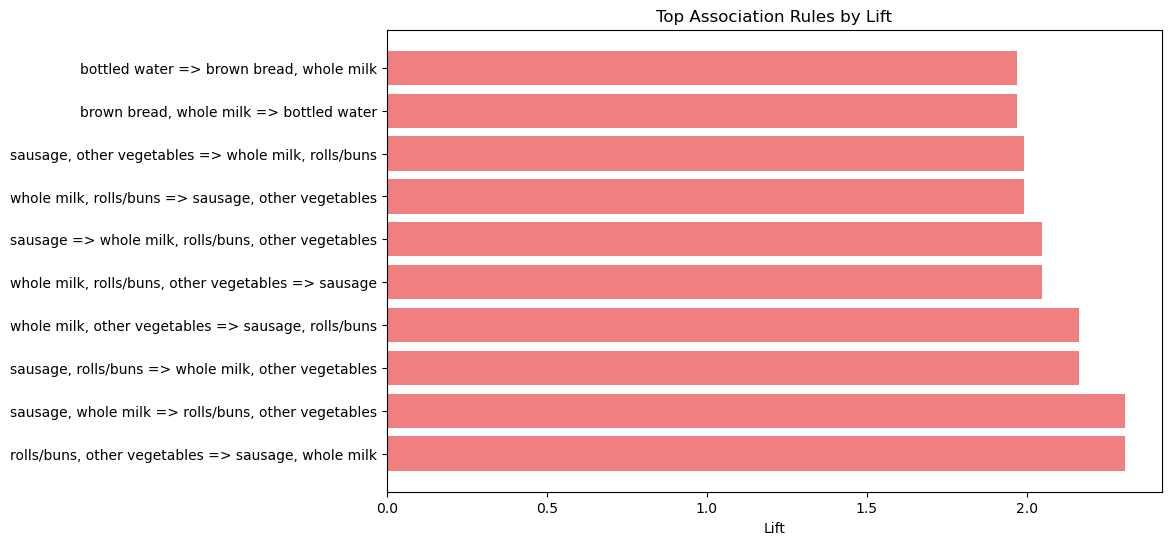

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(top_lift_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " => " + top_lift_rules['consequents'].apply(lambda x: ', '.join(list(x))), 
         top_lift_rules['lift'], color='lightcoral')
plt.xlabel('Lift')
plt.title('Top Association Rules by Lift')
plt.show()

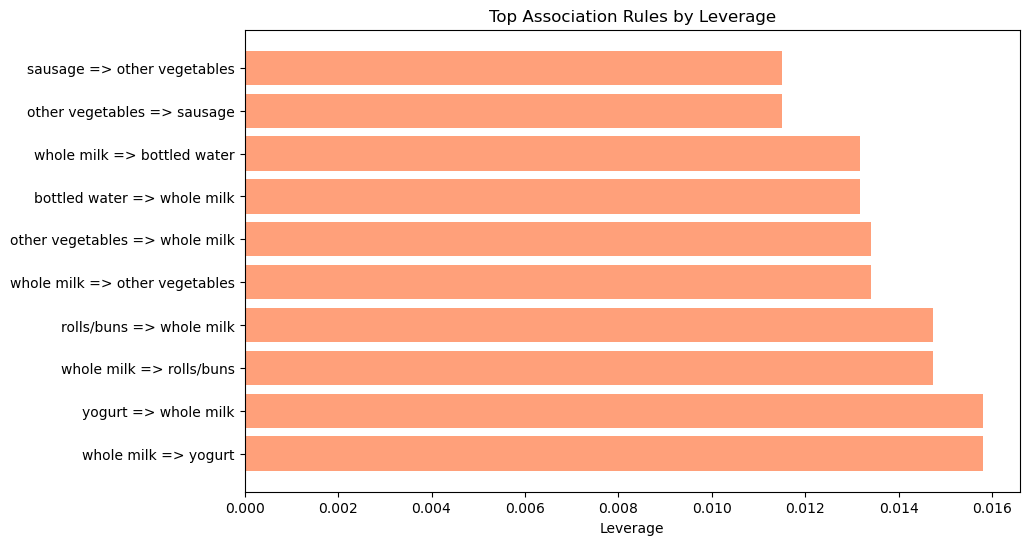

In [25]:
plt.figure(figsize=(10, 6))
plt.barh(top_leverage_rules['antecedents'].apply(lambda x: ', '.join(list(x))) + " => " + top_leverage_rules['consequents'].apply(lambda x: ', '.join(list(x))), 
         top_leverage_rules['leverage'], color='lightsalmon')
plt.xlabel('Leverage')
plt.title('Top Association Rules by Leverage')
plt.show()

Implementation of Apriori Algorithm:


In [30]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

min_support = 0.01
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sample(frac=1).reset_index(drop=True)

def split_rules(rules_df):
    new_rules = []
    for idx, row in rules_df.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        if len(consequents) > 1:
            for consequent in consequents:
                new_rule = {
                    'antecedents': antecedents,
                    'consequents': [consequent],
                    'antecedent support': row['antecedent support'],
                    'consequent support': row['consequent support'],
                    'support': row['support'],
                    'confidence': row['confidence'],
                    'lift': row['lift']
                }
                new_rules.append(new_rule)
        else:
            new_rules.append({
                'antecedents': antecedents,
                'consequents': consequents,
                'antecedent support': row['antecedent support'],
                'consequent support': row['consequent support'],
                'support': row['support'],
                'confidence': row['confidence'],
                'lift': row['lift']
            })

    return pd.DataFrame(new_rules)

rules_variety = split_rules(rules)

num_random_rules = 100
random_rules = rules_variety.sample(n=num_random_rules, random_state=1).reset_index(drop=True)

df_rules_variety = pd.DataFrame(random_rules)

print(df_rules_variety.head())

output_csv_path = 'random_association_rules_variety.csv'
df_rules_variety.to_csv(output_csv_path, index=False)
print(f"DataFrame saved to {output_csv_path}")

                 antecedents      consequents  antecedent support  \
0         (other vegetables)         [yogurt]            0.284866   
1  (brown bread, whole milk)  (bottled water)            0.041839   
2       (whole milk, yogurt)         (coffee)            0.087293   
3                   (yogurt)      (beverages)            0.205837   
4         (whole milk, soda)      (pip fruit)            0.090393   

   consequent support   support  confidence      lift  
0            0.036415  0.013171    0.046238  1.269729  
1            0.159866  0.013171    0.314815  1.969245  
2            0.088843  0.010847    0.124260  1.398651  
3            0.043905  0.011105    0.053952  1.228843  
4            0.120351  0.014721    0.162857  1.353182  
DataFrame saved to random_association_rules_variety.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, legend=False, sizes=(40, 400))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
top_rules = rules.head(20)
sns.heatmap(top_rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean').fillna(0), 
            annot=True, cmap='coolwarm')
plt.title('Heatmap of Lift Values for Top 20 Rules')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer  # Corrected import statement

from sklearn.cluster import KMeans
import numpy as np

rule_vectors = rules[['antecedents', 'consequents']].applymap(lambda x: ' '.join(list(x))).values.flatten()
vectorizer = CountVectorizer()
rule_matrix = vectorizer.fit_transform(rule_vectors)

kmeans = KMeans(n_clusters=5, random_state=0).fit(rule_matrix)
clusters = kmeans.labels_.reshape(-1, 2).max(axis=1)

rules['cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', hue='cluster', palette='viridis', data=rules, legend='full', sizes=(40, 400))
plt.title('Clusters of Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Cluster')
plt.show()

In [ ]:
print(df_rules_variety.head())


Documentation and Reporting:


Findings

Common itemsets such as combinations of dairy products (e.g., whole milk, yogurt) and vegetables (e.g., other vegetables, root vegetables) were frequently bought together.

High-confidence rules typically involved staple items like milk and bread, reflecting common purchasing habits.


Conclusion

This analysis helps us understand what customers buy together and find important product pairings. We can use this information to improve the store layout and recommend products to customers. By looking at different patterns, the grocery store can place products better and give personalized suggestions, aiming to make customers happier and increase sales.

The resulting rules were successfully exported to a CSV file (random_association_rules_variety.csv).

In [2]:
import pandas as pd
dftest = pd.read_csv('Groceriesdatatest.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Groceriesdatatest.csv'